# Curso de Python Scikit-Learn: regressão, classificação e clustering.

## Scikit-Learn

In [ ]:
from sklearn import datasets
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn import tree 
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans 



In [ ]:
df_iris = datasets.load_iris
df_iris

<function sklearn.datasets._base.load_iris>

In [ ]:
diabete = pd.read_csv("https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv")
diabete

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,testado_negativo
764,2,122,70,27,0,36.8,0.340,27,testado_negativo
765,5,121,72,23,112,26.2,0.245,30,testado_negativo
766,1,126,60,0,0,30.1,0.349,47,testado_positivo


In [ ]:
batimentos_cardi = pd.read_csv("https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv")
batimentos_cardi

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063
...,...,...,...,...
995,86.385062,188.432199,37.108050,189.035111
996,63.631394,115.620461,18.905115,130.773648
997,71.200887,139.842839,24.960710,150.330074
998,62.487213,111.959082,17.989771,129.754953


In [ ]:
colesterol = pd.read_csv("https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv")
colesterol

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131
301,57,0,2,130,0,2,174,0,0.0,2,1,3,1,236


## Classification - clf

In [ ]:
x = diabete.drop('resultado', axis = 1)
y= diabete['resultado']

In [ ]:
SEED = 4121988

x_treino,x_teste,y_treino,y_teste = train_test_split(x,y)

In [ ]:
clf_arvore = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [ ]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=4121988)

In [ ]:
clf_arvore.score(x, y).round(3)

0.749

In [ ]:


clf_dummy = DummyClassifier(strategy='most_frequent')

clf_dummy.fit(x_treino, y_treino)

clf_dummy.score(x_teste, y_teste).round(3)

0.682

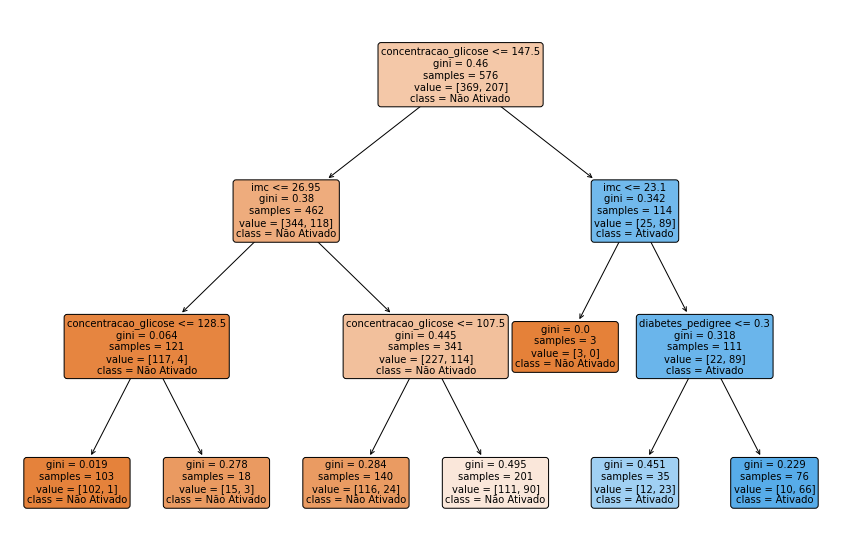

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 
tree.plot_tree(clf_arvore, 
               ax=ax, 
               fontsize=10, 
               rounded=True, 
               filled=True, 
               feature_names=x_treino.columns, 
               class_names=['Não Ativado','Ativado'], 
                )
plt.show()

## Regression - rgs

In [ ]:
batimentos_cardi

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063
...,...,...,...,...
995,86.385062,188.432199,37.108050,189.035111
996,63.631394,115.620461,18.905115,130.773648
997,71.200887,139.842839,24.960710,150.330074
998,62.487213,111.959082,17.989771,129.754953


<Figure size 7200x7200 with 0 Axes>

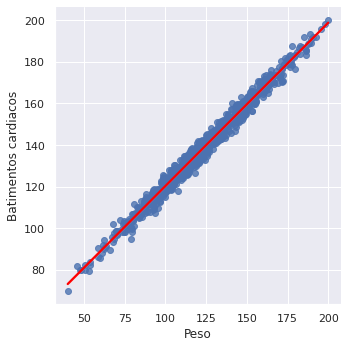

In [ ]:
sns.set()
plt.figure(figsize=(100,100))

sns.lmplot(x='Peso',y='Batimentos cardiacos',data= batimentos_cardi,line_kws={'color':'red'})
plt.show()

In [ ]:
x = batimentos_cardi[['Peso','Idade']]
y = batimentos_cardi['Batimentos cardiacos']


In [ ]:
SEED=4500

#aqui separou o conjunto de dados 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = SEED)

In [ ]:
#aqui separou o rgs como linear model 
rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)



In [ ]:
#aqui ele treinar pela regressão linear 
rgs.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

In [ ]:

#mostra a acuracia do modelo
rgs.score(x_teste, y_teste).round(4)

0.9872

## Clustering - clg

In [ ]:
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


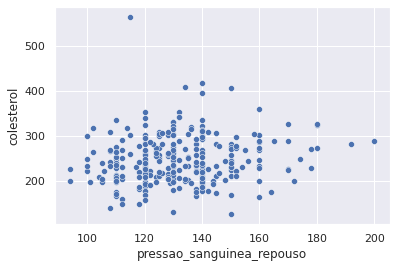

In [ ]:
#aqui ele plotou o grafico de disperção entre pressão sanguinea e o colesterol 

sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

In [ ]:
#uso do Kmeans separando o numero de cluters em 2 e colocando random em 9 
kmeans = KMeans(n_clusters = 2, random_state = 9)
x = colesterol.select_dtypes("int64")

In [ ]:
kmeans.fit(x) #treinamento do modelo (não treina o Y pq é não supervisionado)
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

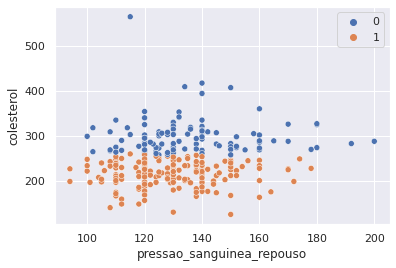

In [ ]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data = colesterol , hue = kmeans.labels_)

In [ ]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


In [ ]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64